In [2]:
%matplotlib inline
from scipy.stats import binom
from pandas import Series
from matplotlib.pyplot import figure, savefig, ylim, legend, gca, plot
from matplotlib import rc
from seaborn import barplot
rc('text', usetex=True)
rc('font', family='serif', serif='Times', size=20)

In [111]:
def f(n=20, p=0.5, k=13, tail='upper', error='I'):  
    y = Series( binom.pmf(range(n+1),n,p) )   
    figure( figsize=(10,5) )
    palette = ['gray']*(n+1)
    q = y
    
    if ( tail=='upper' or tail=='two'):
        plot([k-0.5]*2, [0,1], linestyle='--', color='black')
        gca().annotate( 'Rifiuto', 
                    xy=(0.66, 0.9),  
                    color='red', 
                    xycoords='axes fraction' )
        
    if ( tail=='lower' or tail=='two' ):
        plot([n-k+0.5]*2, [0,1], linestyle='--', color='black') 
        gca().annotate( 'Rifiuto', 
                        xy=(0.33, 0.9),  
                        color='red', 
                        horizontalalignment='right', 
                        xycoords='axes fraction' )
    
    palette = ['gray'] * len(y)
    palette = ['red' if (tail=='lower' and i <=n-k )            else palette[i] for i in range(len(y))]
    palette = ['red' if (tail=='upper' and i >= k  )            else palette[i] for i in range(len(y))]
    palette = ['red' if (tail=='two'   and (i <=n-k or i >= k)) else palette[i] for i in range(len(y))]
    if (error=='II'):
        palette = ['blue' if (palette[i]== 'gray') else 'gray' for i in range(len(y))]
        
    q = [0 if (palette[i]=='gray') else y[i] for i in range(len(y))] 
        
    gca().annotate( '$n=20$\n $p={}$'.format(p), 
                    xy=(0.03, 0.72), 
                    linespacing=1.8, 
                    xycoords='axes fraction' )
    
    gca().annotate( 'Non Rifiuto', xy=(0.5, 0.9), 
                    horizontalalignment='center', 
                    xycoords='axes fraction' )

    return y, palette, sum(q)

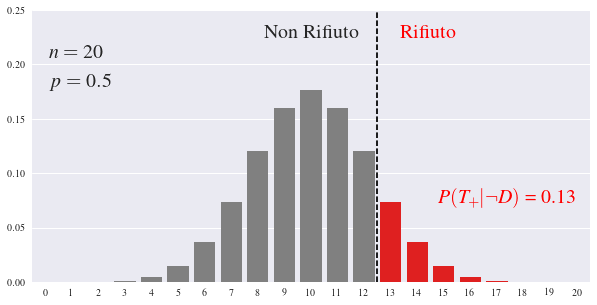

In [109]:
n=20; k=13; p=0.5
y, palette, q = f(n=n, k=k, p=p,  tail='upper', error='I')
ylim(0, 0.25)

gca().text(20, 0.07, r'$P(T_+|\neg D)$\ =\ {:.2f}'.format(q), color='red', horizontalalignment='right')
barplot(x=y.index, y=y, palette=palette)
savefig('figure/p001.pdf',bbox_inches='tight')

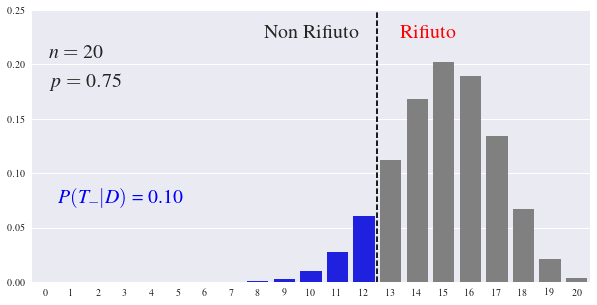

In [112]:
n=20; k=13; p=0.75
y, palette, q = f(n=n, k=k, p=p,  tail='upper', error='II')   
ylim( 0, 0.25 )
gca().text(0.5, .07, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue')
barplot(x=y.index, y=y, palette=palette)
savefig('figure/p002.pdf',bbox_inches='tight')

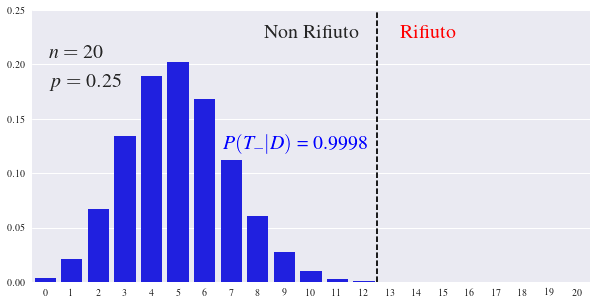

In [113]:
n=20; k=13; p=0.25
y, palette, q = f(n=n, k=k, p=p,  tail='upper', error='II')  
ylim( 0, 0.25 )   
gca().text(6.7, .12, '$P(T_-|D)$\ =\ {:.4f}'.format(q), color='blue')
barplot(x=y.index, y=y, palette=palette)
savefig('figure/p003.pdf',bbox_inches='tight')

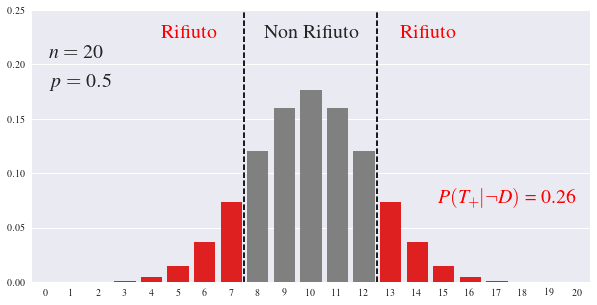

In [114]:
n=20; k=13; p=0.5
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='I')   
ylim(0, 0.25)
gca().text(20, 0.07, r'$P(T_+|\neg D)$\ =\ {:.2f}'.format(q), color='red', horizontalalignment='right')
barplot(x=y.index, y=y, palette=palette)
savefig('figure/p004.pdf',bbox_inches='tight')

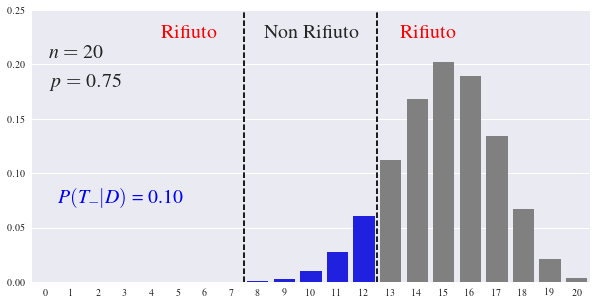

In [115]:
n=20; k=13; p=0.75
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='II')   
ylim(0, 0.25)

gca().text(0.5, .07, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue')
barplot(x=y.index, y=y, palette=palette)
savefig('figure/p005.pdf',bbox_inches='tight')

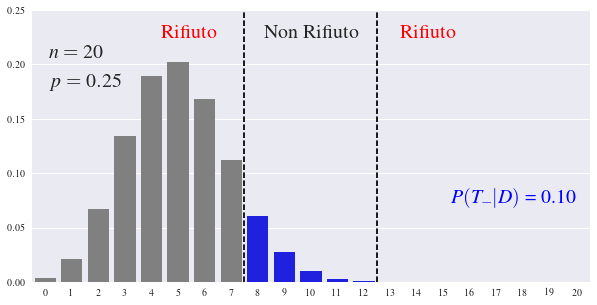

In [116]:
n=20; k=13; p=0.25
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='II')   
ylim(0, 0.25)

gca().text(20, 0.07, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue', horizontalalignment='right')
barplot(x=y.index, y=y, palette=palette)
savefig('figure/p006.pdf',bbox_inches='tight')

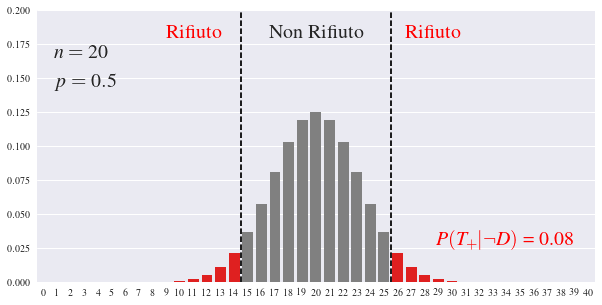

In [117]:
n=40; k=26; p=0.5
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='I')  

ylim(0, 0.20)
gca().text(n-1, 0.025, r'$P(T_+|\neg D)$\ =\ {:.2f}'.format(q), color='red', horizontalalignment='right')
barplot(x=y.index, y=y, palette=palette)
savefig( 'figure/p007.pdf', bbox_inches='tight' )

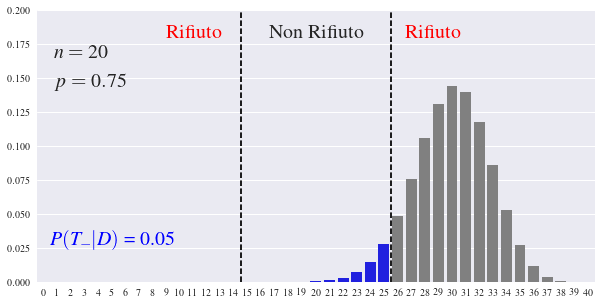

In [118]:
n=40; k=26; p=0.75
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='II')  

ylim(0, 0.20)
gca().text(0.5, .025, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue')
barplot(x=y.index, y=y, palette=palette)
savefig( 'figure/p008.pdf', bbox_inches='tight' )

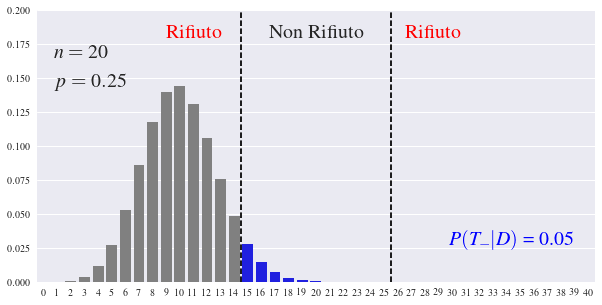

In [119]:
n=40; k=26; p=0.25
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='II')

ylim(0, 0.20)
gca().text(n-1, .025, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue', horizontalalignment='right')
barplot(x=y.index, y=y, palette=palette)
savefig( 'figure/p009.pdf', bbox_inches='tight' )